<a href="https://colab.research.google.com/github/muhammadmo/covid-19-detection/blob/main/IOT_framework(audio).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install keras==2.3.1
!pip install keras==2.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.7.0 which is incompatible.


In [ ]:
pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2632 sha256=ddeb40d518ed08a3cd4e91fa72999cb209e06e18be305c82a09f83cad7ffbedc
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


In [ ]:
pip install keras.metrics

In [ ]:
# feature extractoring and preprocessing data
import librosa
import librosa, librosa.display, os, csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler,scale
from sklearn.model_selection import GridSearchCV, train_test_split, RepeatedStratifiedKFold, cross_val_score, KFold,StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve,roc_auc_score, auc
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


#Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import models
# from keras import layers
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
# from tensorflow.keras.utils import to_categorical
from keras.utils.np_utils import to_categorical


from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import xgboost as xgb
import joblib

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadmoosavi","key":"1fa1bc8aae4bfd517b860f44615ff8d9"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d pranaynandan63/covid-19-cough-sounds

100% 404M/404M [00:08<00:00, 70.8MB/s]
100% 404M/404M [00:08<00:00, 50.1MB/s]


tot_rows 330
audio11


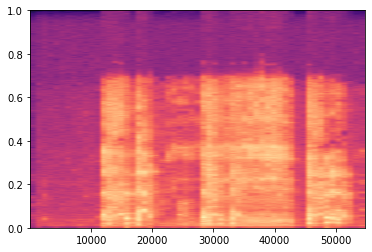

In [ ]:
cmap = plt.get_cmap('inferno')
tot_rows = 330
# print ('tot_rows',tot_rows, 'số cột: ', train_csv.shape[1])
print ('tot_rows',tot_rows)
for i in range(1): #Thay range(1) = range(tot_rows)
    source = 'audio11.wav'
    filename = '/content/XAI Covid-19 Cough/audios_covid/'+source
    y,sr = librosa.load(filename, mono=True, duration=5)
    plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap='magma', sides='default', mode='default', scale='dB');
    #plt.axis('off');
    plt.savefig(f'./{source[:-3].replace(".", "")}.png')
    print (source[:-4]) #Bỏ đi 4 kí tự cuối là ".wav"
    #plt.clf()

In [ ]:
# Extracting features from Spectrogram
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()
print (header)

['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


In [ ]:
header

['filename',
 'chroma_stft',
 'rmse',
 'spectral_centroid',
 'spectral_bandwidth',
 'rolloff',
 'zero_crossing_rate',
 'mfcc1',
 'mfcc2',
 'mfcc3',
 'mfcc4',
 'mfcc5',
 'mfcc6',
 'mfcc7',
 'mfcc8',
 'mfcc9',
 'mfcc10',
 'mfcc11',
 'mfcc12',
 'mfcc13',
 'mfcc14',
 'mfcc15',
 'mfcc16',
 'mfcc17',
 'mfcc18',
 'mfcc19',
 'mfcc20',
 'label']

source audio15.wav

label COVID-19
source audio12.wav

label COVID-19
source audio19.wav

label COVID-19
source cough-heavy-hte8VptUoGVFEqvHpbh5brgfcNP2.wav

label COVID-19
source pos-0422-096-cough-m-31.wav

label COVID-19
source audio1.wav

label COVID-19
source audio17.wav

label COVID-19
source cough-heavy-QjBZv868nydJzk0ZzwgKDHSG6Q82.wav

label COVID-19
source cough-shallow-hte8VptUoGVFEqvHpbh5brgfcNP2.wav

label COVID-19
source pos-0421-094-cough-m-51.wav

label COVID-19
source cough-heavy-6T43bddKoKfG7MwnJWvrPZSsyrc2.wav

label COVID-19
source audio4.wav

label COVID-19
source audio13.wav

label COVID-19
source cough-heavy-3CwioNQVDBQ6CttLyFVRJpMpVHk2.wav

label COVID-19
source cough-heavy-hNAGUEhL2Nh7V89at3yFEjQYo6c2.wav

label COVID-19
source audio8.wav

label COVID-19
source audio11.wav

label COVID-19
source audio7.wav

label COVID-19
source audio5.wav

label COVID-19
source audio9.wav

label COVID-19
source audio10.wav

label COVID-19
source audio16.wav

label COVID-19
sour

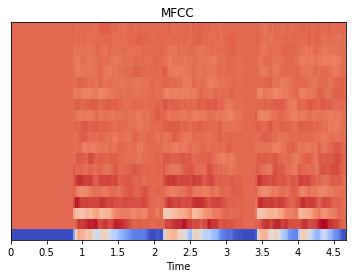

In [ ]:
# Writing data to csv file

# tot_rows = train_csv.shape[0]

file = open('data_new_extended.csv', 'w')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
data_new_extended = pd.read_csv('/content/data_new_extended.csv')
#print ('data_new_extended\n',data_new_extended)
for i in range(len(COVIDfiles)):
        source = COVIDfiles[i]
        print ('source',source)
        file_name = '/content/dataset/1COVID/'+source
        label =  label
        print ('\nlabel', label)
        y,sr = librosa.load(file_name, mono=True, duration=5)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr,hop_length=1024)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr,hop_length=1024)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr,hop_length=1024) #Nên có hop-length
        #print ('spec_cent',spec_cent, 'shape:',spec_cent.shape)
        #print ('spec_bw',spec_bw, 'shape:',spec_bw.shape)
        #print ('rolloff',rolloff, 'shape:',rolloff.shape)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        #print ('mfcc',mfcc)
        to_append = f'{np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
        #np.mean tính trung bình giá trị
        librosa.display.specshow(mfcc, x_axis='time') #Show MFCC
        plt.title('MFCC')
        #plt.show()

        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {label}'
        value = [str(source)]
        value.extend(to_append.split())
        file = open('data_new_extended.csv', 'a')
        with file:
            writer = csv.writer(file)
            writer.writerow(value)

data_new_extended = pd.read_csv('/content/data_new_extended.csv')
print ('data_new_extended\n',data_new_extended)

In [ ]:
data = pd.read_csv('/content/data_new_extended.csv')
data

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,audio15.wav,0.617522,0.004767,2437.239706,2462.838230,5383.300781,0.137085,-361.218872,96.155449,-13.512672,...,-6.764610,-14.463193,-2.047960,-8.324817,1.760440,-10.199375,2.041679,-11.893743,-4.198473,COVID-19
1,audio12.wav,0.351491,0.027682,1711.241398,1905.094687,3677.055759,0.125993,-463.256775,47.235237,-1.711265,...,-2.645979,-3.131516,-3.246186,-3.801576,-3.977428,-2.445503,-3.138112,-4.214176,-3.232360,COVID-19
2,audio19.wav,0.409739,0.028128,2182.861817,1989.030059,4346.716309,0.141064,-440.582031,40.799797,-6.748051,...,-5.001585,1.367463,-5.801293,-1.168254,-7.311837,-4.430622,-4.765462,-6.004795,-3.816397,COVID-19
3,cough-heavy-hte8VptUoGVFEqvHpbh5brgfcNP2.wav,0.309277,0.026976,1798.701287,1609.479602,3409.025065,0.121453,-356.820557,101.568939,-28.543821,...,-4.710785,10.763021,0.748671,-5.107100,-3.581699,-5.185194,-4.730515,-13.080507,-6.199188,COVID-19
4,pos-0422-096-cough-m-31.wav,0.362192,0.077938,2270.995016,1766.045525,4110.847982,0.175282,-320.318939,73.559555,-29.058117,...,-10.217314,1.260500,-11.598354,-1.837203,-9.892962,-4.775889,-3.061490,3.398159,-7.010863,COVID-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0qktEoIX2Sk_ 40.000_ 50.000.wav,0.337312,0.030013,2708.189533,2570.801537,5811.871338,0.135846,-340.764923,66.570488,-9.232458,...,-8.487209,-8.998619,-11.752527,-7.193403,-12.677223,-12.654780,-9.691325,-10.470808,-5.526122,NORMAL
76,audio35.wav,0.458894,0.040610,3324.338705,2360.827805,5812.967936,0.240029,-252.343475,51.856552,-34.494259,...,-1.746821,0.014637,3.488702,0.554321,-1.522503,-3.625226,-2.408798,-4.906168,0.786647,NORMAL
77,audio27.wav,0.585679,0.014780,1390.739365,1457.261682,2825.136312,0.069252,-489.432983,76.979019,-12.549963,...,3.447635,6.020227,1.167775,2.007513,0.537651,-2.047218,2.410251,3.250026,2.347101,NORMAL
78,audio21.wav,0.442778,0.056437,4750.532044,2727.751396,7719.055176,0.342737,-171.575958,3.534905,6.641980,...,-0.612846,-4.636992,-7.177852,-0.415460,2.613241,-4.852502,0.048553,-4.772406,-4.603800,NORMAL


In [ ]:
data.shape

(80, 28)

In [ ]:
#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

pos, neg = np.bincount(y)
total = neg + pos
print ('positive: {} ({:.2f}% of total) \nnegative cases: {}'.format(pos, 100 * pos/total ,neg))

positive: 36 (45.00% of total) 
negative cases: 44


In [ ]:
#Scaling the Feature columns
scaler = StandardScaler()
print ('X before scaling:\n',np.array(data.iloc[:, :-1]))
X = scaler.fit_transform(np.array(data.iloc[:, 1:-1], dtype = float))
print ('\nX after scaling:\n',X,'\nX.shape', X.shape)

X before scaling:
 [['audio15.wav' 0.6175217628479004 0.0047672004438936 ...
  2.04167914390564 -11.893742561340332 -4.1984734535217285]
 ['audio12.wav' 0.3514912128448486 0.0276819225400686 ...
  -3.1381115913391118 -4.214175701141357 -3.2323598861694336]
 ['audio19.wav' 0.4097388386726379 0.028128420934081 ...
  -4.765462398529053 -6.004795074462891 -3.816396951675415]
 ...
 ['audio27.wav' 0.5856786370277405 0.0147795854136347 ...
  2.4102511405944824 3.2500264644622803 2.347101211547852]
 ['audio21.wav' 0.442778468132019 0.0564374513924121 ...
  0.0485533252358436 -4.772405624389648 -4.603799819946289]
 ['audio36.wav' 0.5524957776069641 0.0235039256513118 ...
  0.5581886172294617 -4.122995376586914 2.217642545700073]]

X after scaling:
 [[ 2.10189389 -1.16985383  0.04127839 ...  1.265873   -1.44813292
  -0.32928698]
 [-0.94165515 -0.5496561  -0.88619188 ...  0.13985705  0.02418393
  -0.1235479 ]
 [-0.27526738 -0.53757141 -0.28369197 ... -0.21390685 -0.31911135
  -0.24792174]
 ...
 [

In [ ]:
#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state = None, stratify = y)
#print (y_test)
print (len(y_test))

20


In [ ]:
X_train.shape


(60, 26)

In [ ]:
X_test.shape


(20, 26)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
ANN=Sequential()

ANN.add(Dense(512,input_shape=(X_train.shape[1],)))
ANN.add(Activation('relu'))
ANN.add(Dropout(0.5))

ANN.add(Dense(256))
ANN.add(Activation('relu'))
ANN.add(Dropout(0.5))

ANN.add(Dense(128))
ANN.add(Activation('relu'))
ANN.add(Dropout(0.5))

ANN.add(Dense(64))
ANN.add(Activation('relu'))
ANN.add(Dropout(0.5))

ANN.add(Dense(10))
ANN.add(Activation('relu'))
ANN.add(Dropout(0.5))

ANN.add(Dense(2))
ANN.add(Activation('softmax'))

ANN.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               13824     
                                                                 
 activation_12 (Activation)  (None, 512)               0         
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 activation_13 (Activation)  (None, 256)               0         
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [ ]:
from tensorflow import keras
# optimizer = keras.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)

ANN.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=Adam(learning_rate=0.001))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

#early stopping
early = EarlyStopping(monitor="val_loss",
                      mode="auto",
                      patience=100)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 15, verbose=1,factor=1e-1, min_lr=0.000001)

checkpoint_filepath = 'checkpointANN2.h5'
Model_check = keras.callbacks.ModelCheckpoint(
    checkpoint_filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

callbacks_list = [ early, learning_rate_reduction]

In [ ]:
history = ANN.fit(X_train, y_train,
                    epochs=200,
                    batch_size=16,
                    callbacks=[early,learning_rate_reduction, Model_check],
                    validation_split=0.15)

Epoch 1/200
1/4 [======>.......................] - ETA: 3s - loss: 0.6126 - accuracy: 0.7500
Epoch 1: val_loss improved from inf to 0.68173, saving model to checkpointANN2.h5
4/4 [==============================] - 2s 138ms/step - loss: 0.8600 - accuracy: 0.5490 - val_loss: 0.6817 - val_accuracy: 0.5556 - lr: 0.0010
Epoch 2/200
1/4 [======>.......................] - ETA: 0s - loss: 0.8701 - accuracy: 0.3750
Epoch 2: val_loss improved from 0.68173 to 0.65276, saving model to checkpointANN2.h5
4/4 [==============================] - 0s 43ms/step - loss: 0.7993 - accuracy: 0.5098 - val_loss: 0.6528 - val_accuracy: 0.5556 - lr: 0.0010
Epoch 3/200
1/4 [======>.......................] - ETA: 0s - loss: 0.8617 - accuracy: 0.5625
Epoch 3: val_loss improved from 0.65276 to 0.64325, saving model to checkpointANN2.h5
4/4 [==============================] - 0s 41ms/step - loss: 0.6858 - accuracy: 0.6078 - val_loss: 0.6433 - val_accuracy: 0.5556 - lr: 0.0010
Epoch 4/200
1/4 [======>...................

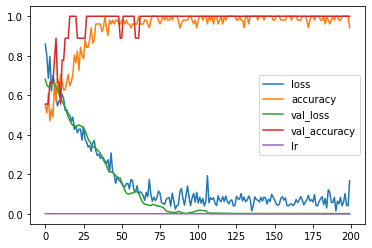

In [ ]:
pd.DataFrame(ANN.history.history).plot()

In [ ]:
test_accuracy=ANN.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])
preds = model.predict(X_test,verbose=1)

0.949999988079071
1/1 [==============================] - 0s 74ms/step


In [ ]:
from keras.models import load_model
model = load_model('checkpointANN2.h5')
test_accu = model.evaluate(X_test,y_test,verbose=0)
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 94.9999988079071 %


In [ ]:
import numpy as np
rounded_labels=np.argmax(preds, axis=1)
rounded_labels[1]

0

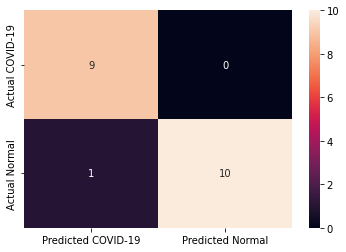

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(y_test[:], rounded_labels, labels=[0, 1]),index=["Actual COVID-19", "Actual Normal"],
columns=["Predicted COVID-19", "Predicted Normal"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
print(classification_report(y_true=y_test[:],y_pred=rounded_labels,target_names =['COVID-19','Normal']))

              precision    recall  f1-score   support

    COVID-19       0.90      1.00      0.95         9
      Normal       1.00      0.91      0.95        11

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

